In [2]:
#auto reload modules 
%load_ext autoreload
%autoreload 2


In [3]:
import torch 
torch.cuda.is_available()

True

In [4]:
from cassie import CassieEnv
from constants import *
import mediapy as media
import functions as f 
import matplotlib.pyplot as plt
plt.set_loglevel("info") 
import warnings 
warnings.filterwarnings('ignore')

c:\Users\alhussein Jamil\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
DEBUG:matplotlib:matplotlib data path: c:\Users\alhussein Jamil\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\mpl-data
DEBUG:matplotlib:CONFIGDIR=C:\Users\alhussein Jamil\.matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is win32
DEBUG:matplotlib:CACHEDIR=C:\Users\alhussein Jamil\.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from C:\Users\alhussein Jamil\.matplotlib\fontlist-v330.json


In [5]:
ex_nested_dict = {
    "a": 1,
    "b": 2,
    "c": {
        "d": 3,
        "e": 4,
        "f": {
            "g": 5,
            "h": 6,
            "i": {
                "j": 7,
                "k": 8,
                "l": {
                    "m": 9,
                    "n": [10, 11, [12, 13]],
                    "o": {
                        "p": 13,
                    }

                }
            }
        }
    }
}
f.flatten_dict(ex_nested_dict)


{'a': 1,
 'b': 2,
 'c_d': 3,
 'c_e': 4,
 'c_f_g': 5,
 'c_f_h': 6,
 'c_f_i_j': 7,
 'c_f_i_k': 8,
 'c_f_i_l_m': 9,
 'c_f_i_l_n': [10, 11, [12, 13]],
 'c_f_i_l_o_p': 13}

In [6]:
cassie = CassieEnv({})
cassie.render_mode = "rgb_array"
cassie.reset()
ranges=None

In [7]:
# cassie.step(cassie.action_space.sample())
# cassie._get_obs(),cassie._get_symmetric_obs()

IndexError: index 25 is out of bounds for axis 0 with size 25

In [8]:
import constants as c   

In [9]:
np.array(cassie.data.sensordata).shape

(29,)

In [10]:
print(cassie.data.sensordata)
for key in c.sensor_ranges.keys():
    print(key, cassie.data.sensor(key).data)


[-2.07262082e-01  1.37413045e+00  6.15285794e-01 -1.30156604e+01
 -1.74721126e+00 -1.46645961e-02  1.01963189e+00 -3.49442251e-02
 -2.10542213e-01  1.79435236e-01  2.27825494e-01 -1.35612360e+01
 -2.79459299e+00  5.79641481e-02  1.00998414e+00 -5.58918598e-02
  9.99963979e-01  4.46816453e-03  5.93505753e-03  4.10498043e-03
  1.91752559e+00  1.32551333e+00 -1.07512455e+00 -1.39517177e+01
  2.00721973e+01 -1.27625061e+01 -4.13135138e-03 -4.99963185e-01
  4.44364029e-03]
left-hip-roll-input [-0.20726208]
left-hip-yaw-input [1.37413045]
left-hip-pitch-input [0.61528579]
left-knee-input [-13.01566042]
left-foot-input [-1.74721126]
left-shin-output [-0.0146646]
left-tarsus-output [1.01963189]
left-foot-output [-0.03494423]
right-hip-roll-input [-0.21054221]
right-hip-yaw-input [0.17943524]
right-hip-pitch-input [0.22782549]
right-knee-input [-13.56123601]
right-foot-input [-2.79459299]
right-shin-output [0.05796415]
right-tarsus-output [1.00998414]
right-foot-output [-0.05589186]
pelvis-orie

In [11]:
x = np.linspace(0, 1, 10000)

In [12]:
reg = []
diffs = []
# fig, ax = plt.subplots(10,5,figsize=(16, 20), sharex=True, sharey=True)

for kappa in range(200):
    von_mises = f.p_between_von_mises(a = 0 , b = 0.5, kappa = kappa , x = x) 
    min_diff = np.inf
    min_u = 0
    for j in range(300):
        u = j/10.0
        approx =  1/2+1/2*(np.tanh(u*np.sin(2*np.pi*x)))
        diff = np.mean(np.abs(von_mises-approx))
        if diff < min_diff:
            min_diff = diff
            min_u = u
    reg.append([kappa,min_u])
    diffs.append(min_diff)

In [13]:
phis= np.linspace(0, 1, 50)
von_mises_values = [f.p_between_von_mises(a = 0 , b = 0.5, kappa = 25 , x = phi) for phi in phis]

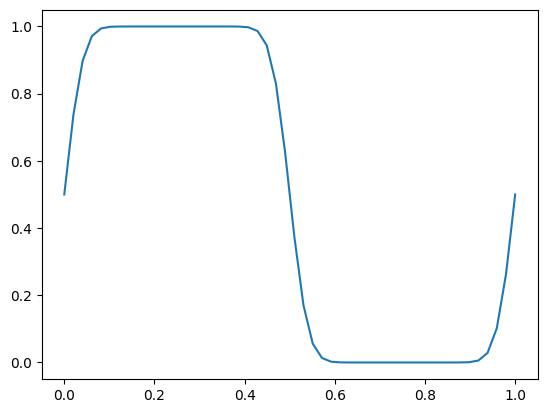

In [14]:
plt.plot(phis,von_mises_values)

a = 6.072980079037679
b = 0.05573903726330689
c = -3.936458863461854
d = 2.365670701763357
The function to use is y = 6.072980 * log(0.055739 * x + 2.365671) + -3.936459


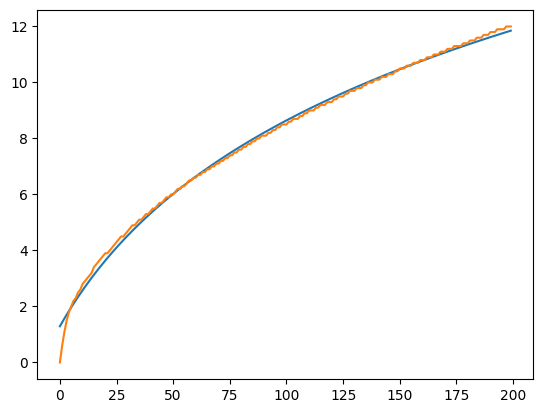

In [15]:
import numpy as np
from scipy.optimize import curve_fit
import math

# Define the logarithmic function
def logarithmic_func(x, a, b, c, d):
    return a * np.log(b * x+ d ) + c

# Input data
data = np.array(reg)

# Extract x and y values from the data
x_data = data[:, 0]
y_data = data[:, 1]

# Make sure x values are positive since we are using logarithms
x_data_positive = np.where(x_data > 0, x_data, 1e-10)

# Fit the data using the logarithmic function
params, _ = curve_fit(logarithmic_func, x_data_positive, y_data)

# Extract the coefficients
a, b, c,d= params

# Print the coefficients
print("a =", a)
print("b =", b)
print("c =", c)
print("d =", d)
plt.plot(x_data, logarithmic_func(x_data, a, b, c,d))
plt.plot(x_data, y_data)
print("The function to use is y = {:1f} * log({:1f} * x + {:1f}) + {:1f}".format(a, b, d, c))

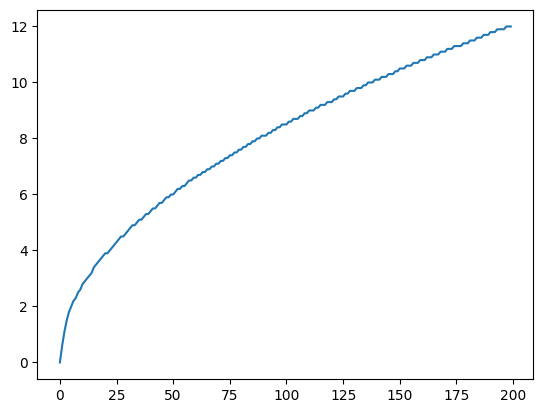

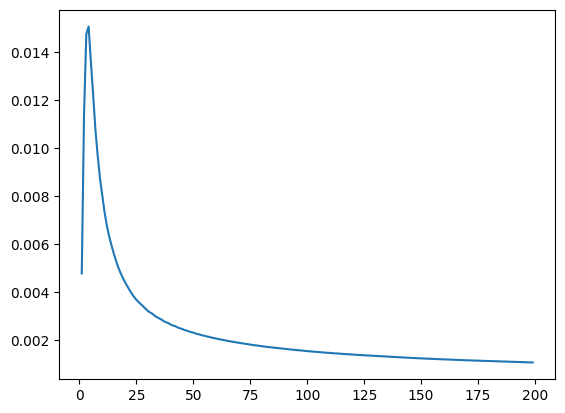

In [16]:
plt.plot(np.array(reg)[:,0], np.array(reg)[:,1])
plt.show()
plt.plot(diffs)

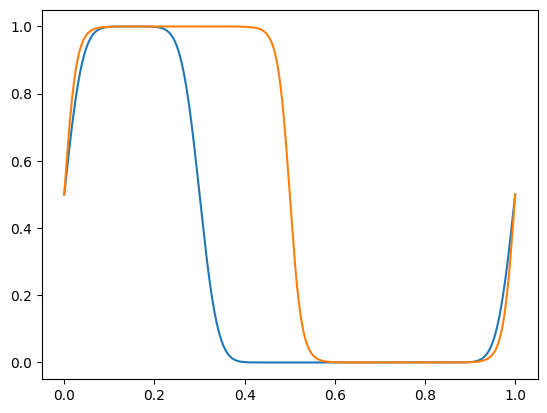

In [17]:

plt.plot(x,f.p_between_von_mises(a = 0 , b = 0.3, kappa = 25 , x = x) )
plt.plot(x, 1/2+1/2*(np.tanh(6*np.sin(2*np.pi*x))))

In [28]:
#detect ranges for each observation by moving the joints randomly and recording the min and max values
cassie = CassieEnv({})
cassie.reset()
ranges = np.zeros((2,29))
for i in range(10000):
    observation, reward, terminated, _, info = cassie.step(cassie.action_space.sample())

    if(i==0 and ranges is None):
        ranges = np.array([cassie.data.sensordata,cassie.data.sensordata],dtype=np.float16)
    else:
        ranges[0,:] = np.minimum(ranges[0,:],cassie.data.sensordata)
        ranges[1,:] = np.maximum(ranges[1,:],cassie.data.sensordata)


In [25]:
#detect ranges for each observation by moving the joints randomly and recording the min and max values
cassie = CassieEnv({})
cassie.reset()
for i in range(1000):
    observation, reward, terminated, _, info = cassie.step(cassie.action_space.sample())
    if(i==0 and ranges is None):
        ranges = np.array([observation,observation],dtype=np.float16)
    else:
        ranges[0,:] = np.minimum(ranges[0,:],observation)
        ranges[1,:] = np.maximum(ranges[1,:],observation)


ValueError: operands could not be broadcast together with shapes (29,) (25,) 

In [29]:
ranges

array([[ -11.66710038,  -16.76349899,  -18.4112323 ,  -49.7551359 ,
        -131.30898465,   -0.24915876,    0.        ,   -2.62617969,
         -14.55559344,  -15.39785878,  -18.88788959,  -49.81543656,
        -131.5527341 ,   -0.22268408,    0.        ,   -2.63105468,
          -0.86161699,   -0.98414859,   -0.95678078,   -0.96578644,
         -12.51030275,  -24.74547084,  -12.8798909 , -157.        ,
        -157.        , -157.        ,   -0.4970794 ,   -0.49999502,
          -0.49997293],
       [  14.32857225,   16.90655347,   26.99296745,    0.        ,
           0.        ,    0.28819708,    3.29892122,    0.        ,
          11.06994884,   15.72413267,   26.84304735,    0.        ,
           0.        ,    0.28561065,    3.25693504,    0.        ,
           0.9999939 ,    0.99078812,    0.98886115,    0.98515911,
          13.58520575,   24.47296733,   15.37606835,  157.        ,
         157.        ,  157.        ,    0.49999002,    0.49995502,
           0.49995806]])

In [19]:
cassie.reset()

(array([-1.70443600e-01, -3.06298169e-02, -6.66850610e-02, -1.26884119e+01,
         2.81077304e-03, -8.58262427e-03,  1.02040513e+00,  5.62154608e-05,
        -1.25407597e-01, -9.20245939e-02, -1.53097089e-02, -1.26881435e+01,
        -4.17408784e-01,  4.59743615e-03,  1.00803617e+00, -8.34817567e-03,
         9.99993880e-01,  1.77479811e-03, -1.10490792e-03,  2.80534361e-03,
         9.78427998e-03,  5.04561450e-03, -7.24763155e-03,  1.29777997e+00,
         1.10820210e+00,  1.30578346e+00, -2.80336545e-03, -4.99988980e-01,
         1.77788689e-03,  0.00000000e+00,  1.00000000e+00]),
 {})

In [20]:
obs_ranges = np.array([np.floor(ranges[0,:]),np.ceil(ranges[1,:])],np.float16)

In [21]:
obs_ranges

array([[ -10.,  -12.,  -17.,  -46.,  -88.,   -1.,    0.,   -2.,  -13.,
         -13.,  -19.,  -48.,  -79.,   -1.,    0.,   -2.,    0.,   -1.,
          -1.,   -1.,  -11.,  -19.,   -6.,  -87., -125.,  -58.,   -1.,
          -1.,   -1.,   -1.,   -1.],
       [  11.,   13.,   25.,   -7.,   -1.,    1.,    3.,   -0.,   11.,
          14.,   25.,   -8.,   -2.,    1.,    4.,   -0.,    1.,    1.,
           1.,    1.,   10.,   16.,    7.,   53.,   71.,   96.,    1.,
           1.,    1.,    1.,    1.]], dtype=float16)

# Randomized moveoemnt 

0


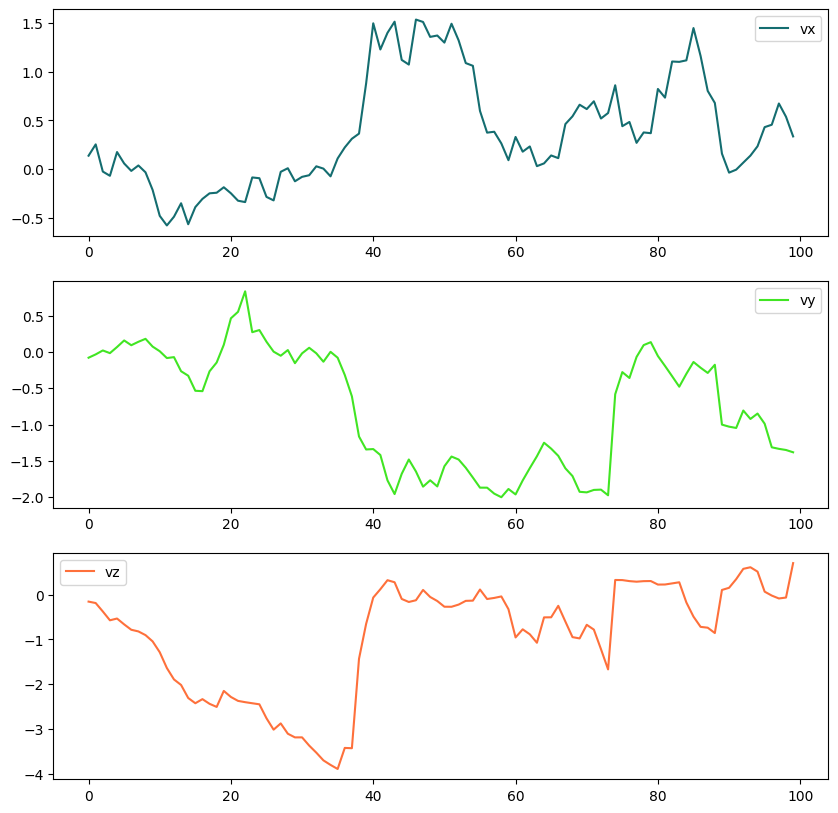

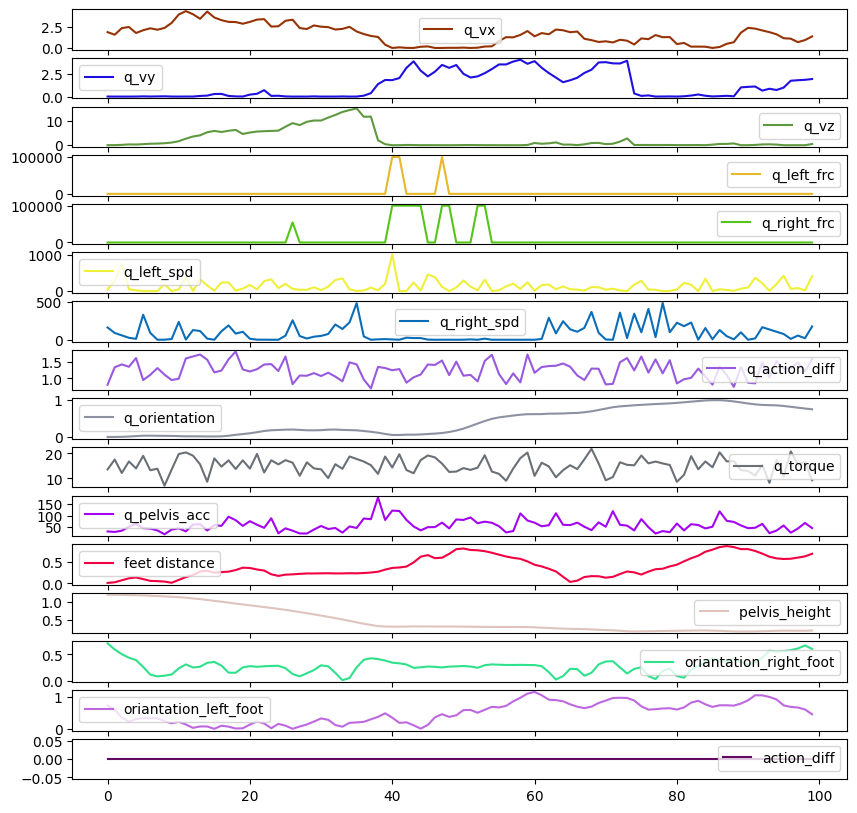

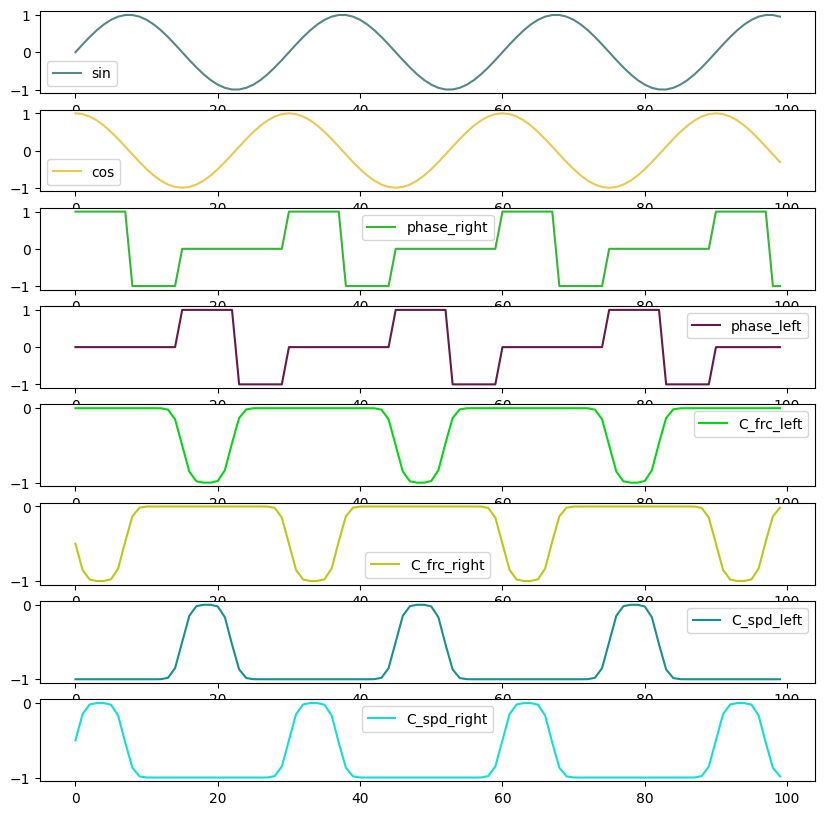

In [22]:
#show a video of 100steps of the environment and register some metrics 
env = CassieEnv({"r":0.3})
obs,_ = env.reset(seed = np.random.randint(0,1000))
print(env.phi)
env.render_mode = "rgb_array"
metrics = {}
frames = []
metrics["vx"] = []
metrics["vy"] = []
metrics["vz"] = []

C = {}
exponents = {}
max_steps = 100
number_of_rounds = 4
for i in range(max_steps):

    action = cassie.action_space.sample()
    obs, reward, terminated, _, _ = env.step(action)
    frames.append(env.render())
    metrics["vz"] .append( env.data.qvel[2])
    metrics["vx"] .append( env.data.qvel[0])
    metrics["vy"] .append( env.data.qvel[1])
    for exponent, value in env.exponents.items():
        if exponent not in exponents.keys():
            exponents[exponent] = [value]
        else:
            exponents[exponent].append(value)
    # for metric,value in env.used_quantities.items():
    #     if metric not in metrics.keys():
    #         metrics[metric] = [value]
    #     else:
    #         metrics[metric].append(value)

    for key,value in env.C.items():
        if key not in C.keys():
            C[key] = [value]
        else:
            C[key].append(value)

env.close()
#save video 
media.show_video( frames, fps=30)
#plot the metrics stacked in a vertical way in multiple subplots
import matplotlib.pyplot as plt
fig, axs = plt.subplots(len(metrics.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(metrics.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(metrics[metric], color=s)
    axs[i].legend([metric])

plt.show()


#do the same thing for the exponents
fig, axs = plt.subplots(len(exponents.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(exponents.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(np.clip(exponents[metric],0,100000), color=s)
    axs[i].legend([metric])

plt.show()

#do the same for C 
fig, axs = plt.subplots(len(C.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(C.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(C[metric], color=s)
    axs[i].legend([metric])

In [23]:
import loader as l 
loader = l.Loader()
config  = loader.load_config("dict_config_test.yaml")

{'gamma': 0.99, 'lr': 0.001, 'train_batch_size': 50000, 'model': {'fcnet_hiddens': [256, 256], 'fcnet_activation': 'swish', 'vf_share_layers': False, 'free_log_std': True}, 'optimizer': {'type': 'adam'}, 'use_critic': True, 'use_gae': True, 'lambda_': 0.95, 'kl_coeff': 0.2, 'sgd_minibatch_size': 9000, 'num_sgd_iter': 5, 'shuffle_sequences': True, 'vf_loss_coeff': 0.5, 'entropy_coeff': 0.01, 'clip_param': 0.3, 'kl_target': 0.01, 'vf_clip_param': 1000.0, 'env': 'cassie-v0', 'disable_env_checking': True, 'clip_actions': True, 'framework': 'torch', 'num_rollout_workers': 1, 'num_envs_per_worker': 1, 'rollout_fragment_length': 'auto', 'batch_mode': 'truncate_episodes', 'recreate_failed_workers': True, 'observation_filter': 'MeanStdFilter', 'evaluation_interval': 2, 'evaluation_duration': 10, 'num_gpus': 0, 'num_cpus_per_worker': 1}


In [24]:
from ray.rllib.algorithms.ppo import PPOConfig
from ray.tune.registry import register_env

In [25]:
register_env("cassie-v0", lambda config: CassieEnv(config))

In [26]:

import ray 
ray.init(ignore_reinit_error=True)
trainer = PPOConfig().from_dict(config).build()


DEBUG:filelock:Attempting to acquire lock 2226543750992 on C:\Users\ALHUSS~1\AppData\Local\Temp\ray\session_2023-06-12_00-07-32_045114_6772\ports_by_node.json.lock
DEBUG:filelock:Lock 2226543750992 acquired on C:\Users\ALHUSS~1\AppData\Local\Temp\ray\session_2023-06-12_00-07-32_045114_6772\ports_by_node.json.lock
DEBUG:filelock:Attempting to release lock 2226543750992 on C:\Users\ALHUSS~1\AppData\Local\Temp\ray\session_2023-06-12_00-07-32_045114_6772\ports_by_node.json.lock
DEBUG:filelock:Lock 2226543750992 released on C:\Users\ALHUSS~1\AppData\Local\Temp\ray\session_2023-06-12_00-07-32_045114_6772\ports_by_node.json.lock
DEBUG:filelock:Attempting to acquire lock 2226543751712 on C:\Users\ALHUSS~1\AppData\Local\Temp\ray\session_2023-06-12_00-07-32_045114_6772\ports_by_node.json.lock
DEBUG:filelock:Lock 2226543751712 acquired on C:\Users\ALHUSS~1\AppData\Local\Temp\ray\session_2023-06-12_00-07-32_045114_6772\ports_by_node.json.lock
DEBUG:filelock:Attempting to release lock 2226543751712

In [27]:
from caps import *

In [28]:
trainer.get_default_policy_class = lambda : CAPSTorchPolicy

In [29]:
import tensorboardX

In [30]:
trainer.get_default_policy_class

<function __main__.<lambda>()>

In [43]:
type(trainer)
import constants as c
c.trainer = trainer

In [ ]:
trainer.from_checkpoint("checkpoint_000460")

trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none
trainer is not none


Left_Force mean  112416.82078711638 Std 167031.58376206382 max 400292.93975428696 min 1272.1732616514935


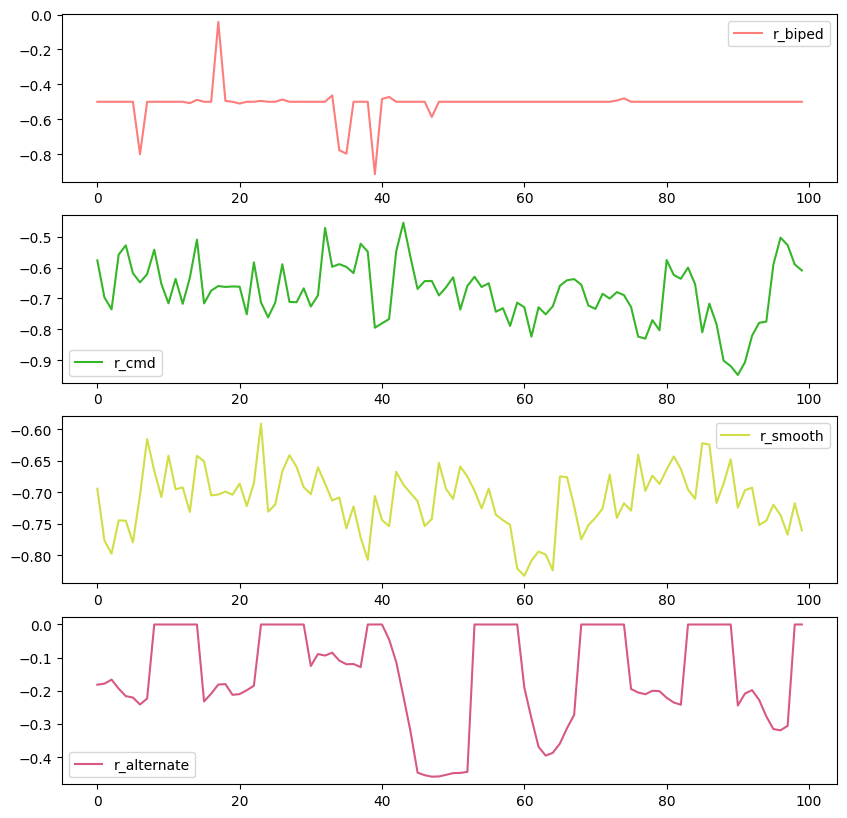

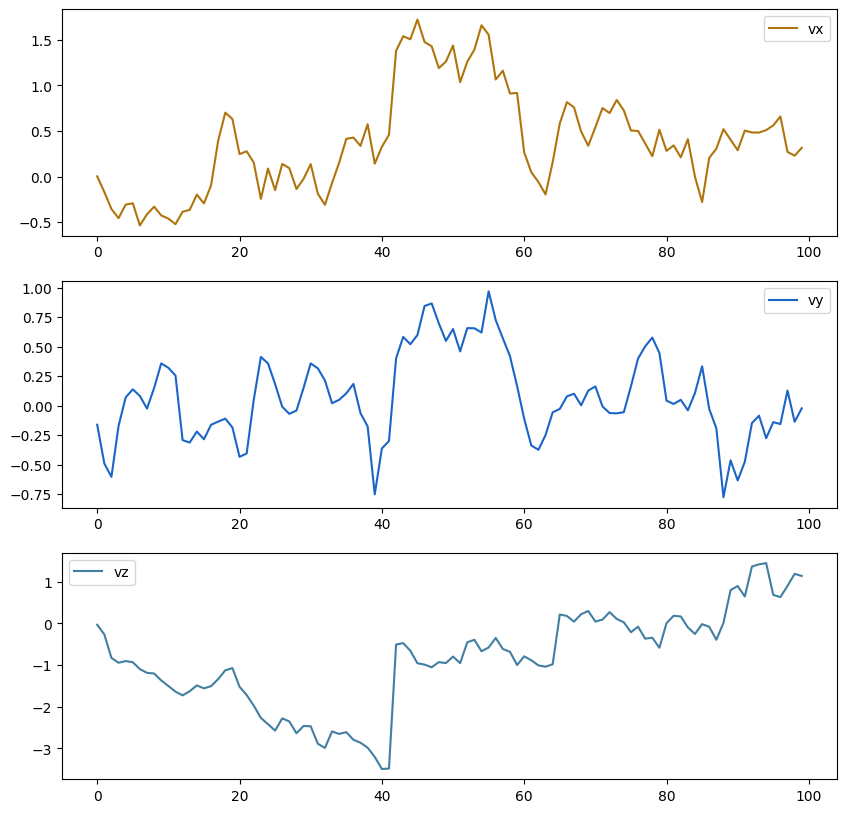

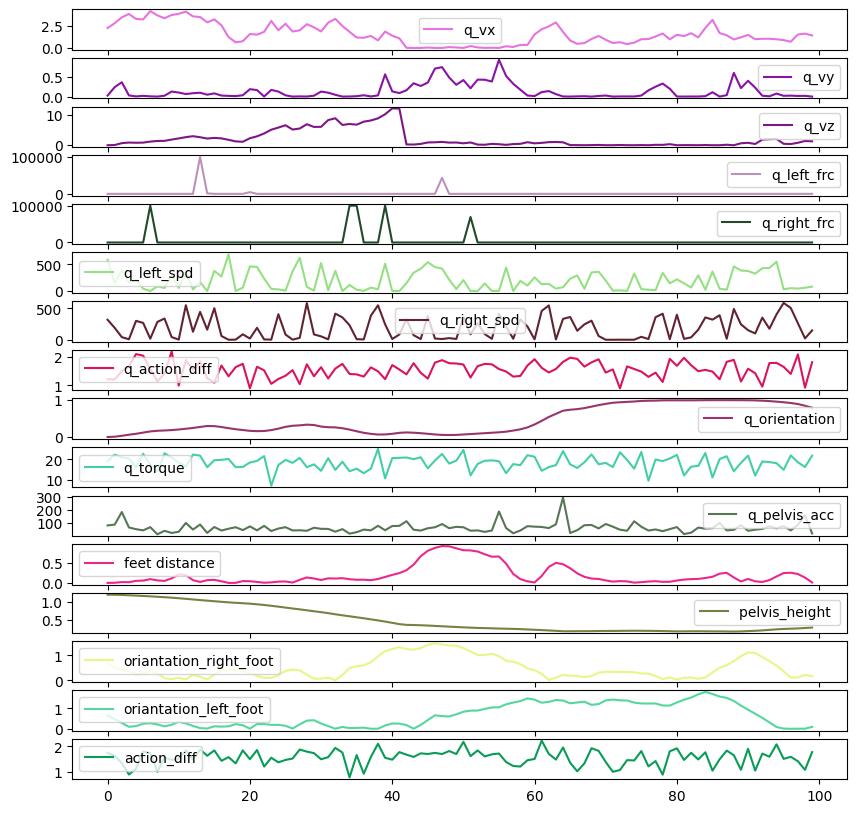

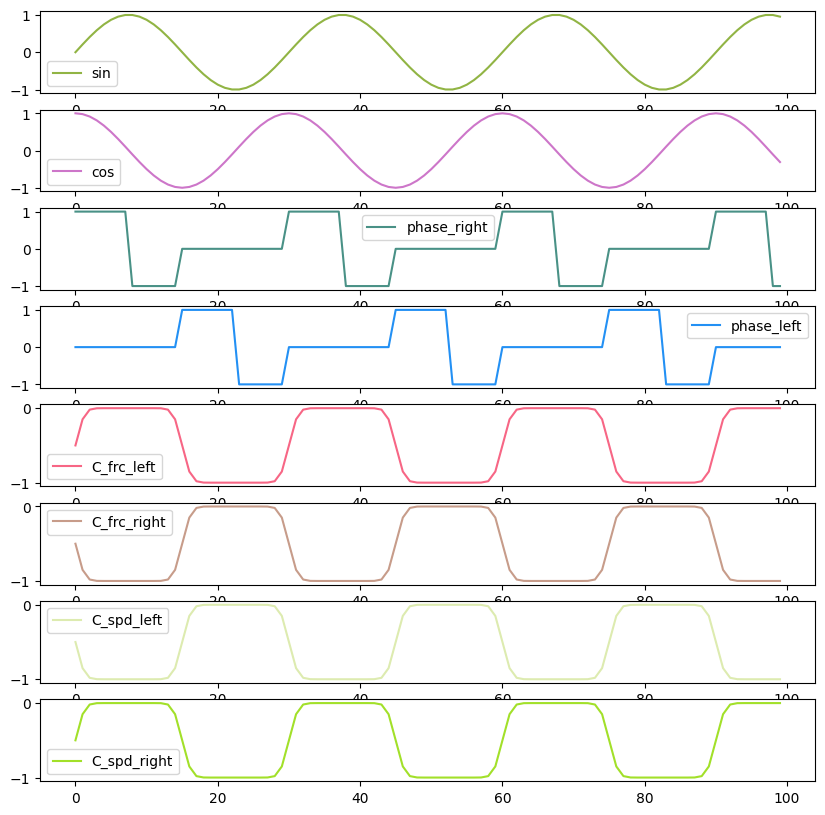

In [44]:
#show a video of 100steps of the environment and register some metrics 
env = CassieEnv({})
obs,_ = env.reset(seed = np.random.randint(0,1000))
env.render_mode = "rgb_array"
metrics = {}
frames = []
metrics["vx"] = []
metrics["vy"] = []
metrics["vz"] = []
rewards = {}
foot_pos = []
filterfn = trainer.workers.local_worker().filters["default_policy"]
C = {}
exponents = {}
max_steps = 100
number_of_rounds = 4
force_squared = []
for i in range(max_steps):
    
    obs = filterfn(obs)
    action = trainer.compute_single_action(obs)
    obs, reward, terminated, _, info = env.step(action)
    foot_pos.append(env.data.xpos[13,2])
    frames.append(env.render())
    metrics["vz"] .append( env.data.qvel[2])
    metrics["vx"] .append( env.data.qvel[0])
    metrics["vy"] .append( env.data.qvel[1])
    for exponent, value in env.exponents.items():
        if exponent not in exponents.keys():
            exponents[exponent] = [value]
        else:
            exponents[exponent].append(value)
    # for metric,value in env.used_quantities.items():
    #     if metric not in metrics.keys():
    #         metrics[metric] = [value]
    #     else:
    #         metrics[metric].append(value)
    for reward,value in info['custom_rewards'].items():
        if reward not in rewards.keys():
            rewards[reward] = [value]
        else:
            rewards[reward].append(value)
    for key,value in env.C.items():
        if key not in C.keys():
            C[key] = [value]
        else:
            C[key].append(value)
    if(env.exponents['q_left_frc']>0):
 
        force_squared.append(env.exponents['q_left_frc'])
env.close()
#save video 
media.show_video( frames, fps=30)

#plot the metrics stacked in a vertical way in multiple subplots
import matplotlib.pyplot as plt

# fig, axs = plt.subplots(12, 1, figsize=(10, 10))

# axs[0].plot(rewards["r_biped"],color = np.random.rand(3,))
# axs[0].legend(["r_biped"])
# axs[1].plot(metrics["q_left_frc"],color = np.random.rand(3,))
# axs[1].legend(["q_left_frc"])
# axs[2].plot(metrics["q_right_frc"],color = np.random.rand(3,))
# axs[2].legend(["q_right_frc"])
# axs[3].plot(metrics["q_left_spd"],color = np.random.rand(3,))
# axs[3].legend(["q_left_spd"])
# axs[4].plot(metrics["q_right_spd"],color = np.random.rand(3,))
# axs[4].legend(["q_right_spd"])
# axs[5].plot(C["C_frc_left"],color = np.random.rand(3,))
# axs[5].legend(["C_frc_left"])
# axs[6].plot(C["C_frc_right"],color = np.random.rand(3,))
# axs[6].legend(["C_frc_right"])
# axs[7].plot(C["C_spd_left"],color = np.random.rand(3,))
# axs[7].legend(["C_spd_left"])
# axs[8].plot(C["C_spd_right"],color = np.random.rand(3,))
# axs[8].legend(["C_spd_right"])
# axs[9].plot(foot_pos)
# axs[9].legend(["foot_pos"])
# axs[10].plot(metrics["q_phase_left"])
# axs[10].legend(["q_phase_left"])
# axs[11].plot(metrics["q_phase_right"])
# axs[11].legend(["q_phase_right"])
# plt.show()

fig, axs = plt.subplots(len(rewards.keys()), 1, figsize=(10, 10))
print("Left_Force mean " ,np.mean(force_squared), "Std" , np.std(force_squared), "max", np.max(force_squared), "min", np.min(force_squared))
for i, metric in enumerate(rewards.keys()):
    # if(metric == "r_biped"):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(rewards[metric], color=s)
    axs[i].legend([metric])
    
plt.show()
fig, axs = plt.subplots(len(metrics.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(metrics.keys()):

    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(metrics[metric], color=s)
    axs[i].legend([metric])

plt.show()


#do the same thing for the exponents
fig, axs = plt.subplots(len(exponents.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(exponents.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(np.clip(exponents[metric],0,100000), color=s)
    axs[i].legend([metric])

plt.show()

#do the same for C 
fig, axs = plt.subplots(len(C.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(C.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(C[metric], color=s)
    axs[i].legend([metric])





In [ ]:
cassie.reset()

first_values=[]
for i in range(200):
    cassie.step(np.zeros(10,) )
    print(len([x for x in cassie.data.cfrc_ext if np.linalg.norm(x)>0.0]))
    if(cassie.exponents["q_right_frc"]>0 or cassie.exponents["q_left_frc"]>0):
        print("i : ", i)
        force = cassie.exponents["q_right_frc"] if cassie.exponents["q_right_frc"]>0 else cassie.exponents["q_left_frc"]
        print("FRC_"+ "right" if cassie.exponents["q_right_frc"]>0 else cassie.exponents["q_left_frc"] , force)
                
        # print(cassie.data.cfrc_ext[1])
        # print(cassie.data.cfrc_ext[4])
    
        #look for the closest value to the force in the external forces

        
    print([np.round(np.linalg.norm(cassie.data.cfrc_ext[j]),2) for j in range(len(cassie.data.cfrc_ext))])

    # if(i==0):
    #     first_values = deepcopy(cassie.data.cfrc_ext)
    # else: 
    #     for j in range(len(first_values)):
    #         if(np.linalg.norm(cassie.data.cfrc_ext[j]-first_values[j])!=0):
    #             print(j, np.linalg.norm(cassie.data.cfrc_ext[j]), np.linalg.norm(first_values[j]))

: 

: 

In [ ]:
cassie = CassieEnv({})
cassie.render_mode = "rgb_array"
cassie.reset()
media.show_image(cassie.render())

: 

In [ ]:
cassie.data.qpos

: 

In [ ]:
x = cassie.data.qpos

#find values that are equal in absolute value
for i in range(len(x)):
    for j in range(len(x)):
        if(i!=j):
            if(np.abs(np.abs(x[i])-np.abs(x[j]))<0.0000001):
                print(i,j, x[i], x[j])

: 

In [ ]:
import mujoco as m

: 

In [ ]:
cassie.reset()
cassie.render_mode = "rgb_array"
frames = []

feet_in_contact = []
for i in range(200):
    cassie.step(np.zeros(10,)) 
    # print('number of contacts', cassie.data.ncon)
    contacts = [contact.geom2 for contact in cassie.data.contact]
    if( 49 in contacts):
        print(contacts.index(49))
        contact_force_left_foot = np.zeros(6)
        m.mj_contactForce(cassie.model, cassie.data, contacts.index(49), contact_force_left_foot)
        print(contact_force_left_foot)
    if(33 in contacts):
        print(contacts.index(33))
        contact_force_right_foot = np.zeros(6)
        m.mj_contactForce(cassie.model, cassie.data, contacts.index(33), contact_force_right_foot)
        print(contact_force_right_foot)
    # if( 49 in contacts):
    #     if("Right" not in feet_in_contact):
    #         feet_in_contact.append("Right")
    # else:
    #     if("Right" in feet_in_contact):
    #         feet_in_contact.remove("Right")
    #     # print('LEFT_FOOT',end=" ")
    # if(33 in contacts):
    #     if("Left" not in feet_in_contact):
    #         feet_in_contact.append("Left")
    # else:
    #     if("Left" in feet_in_contact):

    # feet_in_contact.remove("Left")
    # print(feet_in_contact)
    # # Feet Contact Forces

    # contact_force_left_foot = np.zeros(6)
    # m.mj_contactForce(cassie.model, cassie.data, 1, contact_force_left_foot)
    # frames.append(cassie.render())

media.show_video( frames, fps=10)

: 

In [ ]:
33 droite 
49 gauche

: 

In [ ]:
cassie = CassieEnv({})

: 

In [ ]:
cassie.reset()

: 

In [ ]:
right 25
left 13

: 

In [ ]:

cassie.step(np.zeros(10,))
z = cassie.data.xpos[:,2]
y = cassie.data.xpos[:,1]

plt.scatter(y,z)
#add labels to the points
for i in range(len(y)):
    plt.annotate(i, (y[i], z[i]))

: 

In [ ]:
print(cassie.data.xpos[:,2])
cassie.step(cassie.action_space.sample())
media.show_image(cassie.render())
print(cassie.data.xpos[:,2])

print(np.argsort(cassie.data.xpos[:,2]))
print(np.argsort(cassie.data.xpos[:,1]))
print(np.argsort(cassie.data.xpos[:,0]))

: 

In [ ]:
len(cassie.data.sensordata)

: 

: 